In [10]:
# dowload administrative boundaries
library(tidyverse)
library(geodata)
library(ggspatial)

# Set the output directory for downloaded data
output_dir <- "data/"
ghana_boundary <- gadm("GHA", level = 0, path = output_dir) # level = 0 means country level; country ISO3 code is GHA for Ghana
ghana_boundary_region <- gadm("GHA", level = 1, path = output_dir) # level = 0 means country level; country ISO3 code is GHA for Ghana
country_codes() %>% head() # check the country codes

library(sf)
ghana_boundary_sf <- ghana_boundary %>% st_as_sf()
ghana_boundary_region_sf <- ghana_boundary_region %>% st_as_sf()

,NAME,ISO3,ISO2,NAME_ISO,NAME_FAO,NAME_LOCAL,SOVEREIGN,UNREGION1,UNREGION2,continent
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,AFG,AF,AFGHANISTAN,Afghanistan,Afghanestan,Afghanistan,Southern Asia,Asia,Asia
2,Akrotiri and Dhekelia,XAD,NA,NA,NA,Akrotiri and Dhekelia,United Kingdom,Western Asia,Asia,Asia
3,Åland,ALA,AX,ÅLAND ISLANDS,NA,Åland,Finland,Northern Europe,Europe,Europe
4,Albania,ALB,AL,ALBANIA,Albania,Shqiperia,Albania,Southern Europe,Europe,Europe
5,Algeria,DZA,DZ,ALGERIA,Algeria,Al Jaza'ir,Algeria,Northern Africa,Africa,Africa
6,American Samoa,ASM,AS,AMERICAN SAMOA,American Samoa,American Samoa,United States,Polynesia,Oceania,Oceania


In [4]:
## Import the data file with longitudes and latitudes of the sites
datafile<-"data/data-GH-sample.csv" 

ghana_site <- read.csv(datafile, header = TRUE, stringsAsFactors = FALSE)
head(ghana_site)

,LocationName,Longitude,Latitude
,<chr>,<dbl>,<dbl>
1,Abasuma,-2.5671500,8.837910
2,ABOABO,-2.0600000,7.830000
3,Abodom,-0.8221508,5.530790
4,ABOMBA KODJO,0.3500000,7.830000
5,Abomba Kojo,0.3591000,7.830483
6,ABOMBA KOJO,0.3500000,7.830000


In [ ]:
## Convert to spatial object
coordinates(ghana_prev_clean3) <- (ghana_prev_clean3[, c("Longitude","Latitude")])

ghana_prev_sf <- ghana_prev_clean3 %>% st_as_sf() 
st_crs(ghana_prev_sf) = 4326

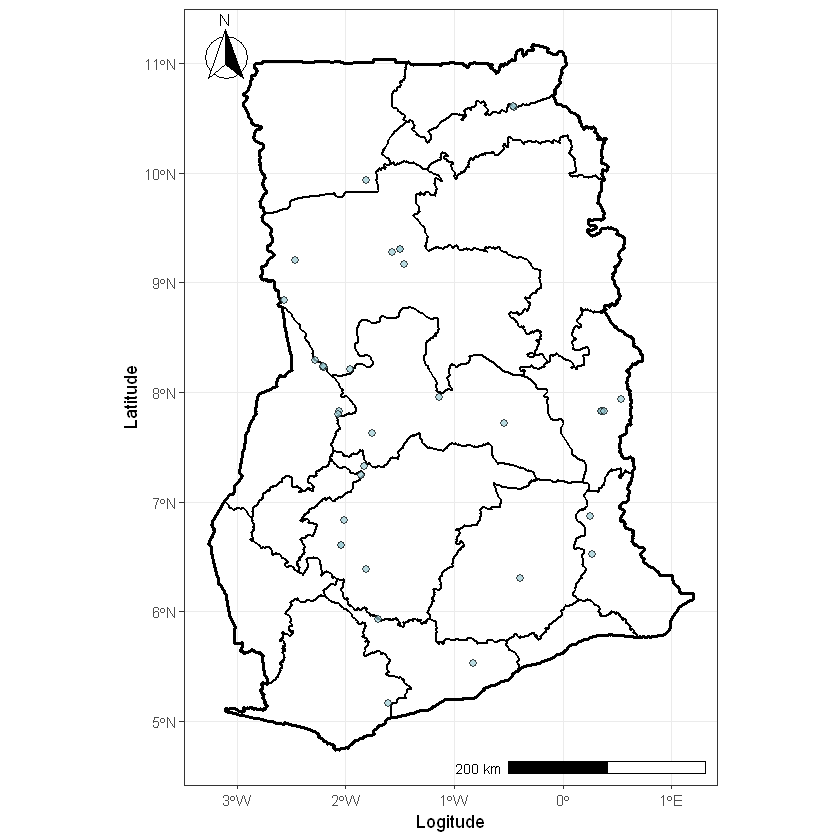

In [15]:
p <- ggplot() +
  geom_sf(data = ghana_boundary_region_sf, col = "black", lwd = 0.8, lty = 1, alpha = 0) +
  geom_sf(data = ghana_boundary_sf, col = "black", lwd = 1, lty = 1, alpha = 0) +
  coord_sf(datum = sf::st_crs(4326))+
  geom_point(data = ghana_site, aes(Longitude, Latitude), color = "black", fill = "#9ccbd4", size = 2, stroke = .5, shape = 21, alpha = .7)+ # plotting points with stroke
  theme_bw() +
  xlab("Logitude") + ylab("Latitude") +
  annotation_scale(location = "br", width_hint = 0.5) +
  annotation_north_arrow(location = "tl", which_north = "true",
        pad_x = unit(0.05, "in"), pad_y = unit(0.05, "in"),
        style = north_arrow_fancy_orienteering)

p

In [16]:
ggsave("ghana_sites.png", width = 6, height = 8, dpi = 600, bg = "white")